In [4]:
import torch # PyTorch Implemented using pyTorch
from IPython.display import  Image

In [7]:
# !git clone https://github.com/ultralytics/yolov5  
# %cd yolov5
# %pip install -r requirements.txt  # install requirement

/Users/akhilsharma/Projects/Mask-NoMask-YOLO/yolov5


In [55]:
# Divide the images in train images & labels

import os 
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/Users/akhilsharma/Projects/Mask-NoMask-YOLO/dataset/images/train'
valPath = '/Users/akhilsharma/Projects/Mask-NoMask YOLO /dataset/images/valid'
crsPath = '/Users/akhilsharma/Projects/Mask-NoMask-YOLO/dataset-coco' #dir where images and annotations stored


#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  736
Validation images are :  184


In [56]:
xmls[:5]

['9a97c47e58ca6324cc0feaef3ef25c8c.txt',
 '20200130004271.txt',
 '20200105pfb29a_Singapore_Changi_Airport.txt',
 'CHINA-HEALTH_THAIaaaLAND_1580210047.txt',
 '2_WORLD_Coronavirus_083975.txt']

In [57]:
train_imagePath = "/Users/akhilsharma/Projects/Mask-NoMask-YOLO/dataset/images/train"
train_labelPath = "/Users/akhilsharma/Projects/Mask-NoMask-YOLO/dataset/labels/train"


for i in range(countForTrain):
    
    fileJpg = choice(imgs)
    fileXml = fileXml = fileJpg[:-4] + '.txt'
    
    if fileJpg[-4:] == "jpeg":
        fileXml = fileJpg[:-5] + '.txt'
    
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(train_imagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(train_labelPath, fileXml))

    imgs.remove(fileJpg)
    xmls.remove(fileXml)

In [58]:
val_imagePath = "/Users/akhilsharma/Projects/Mask-NoMask-YOLO/dataset/images/val"
val_labelPath = "/Users/akhilsharma/Projects/Mask-NoMask-YOLO/dataset/labels/val"


for i in range(countForVal):
    
    fileJpg = choice(imgs)
    fileXml = fileXml = fileJpg[:-4] + '.txt'
    
    if fileJpg[-4:] == "jpeg":
        fileXml = fileJpg[:-5] + '.txt'
    
    
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(val_imagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(val_labelPath, fileXml))

    imgs.remove(fileJpg)
    xmls.remove(fileXml)
    
# shutil.move(crsPath, valPath) 

'/Users/akhilsharma/Projects/Mask-NoMask YOLO /dataset/images/valid/dataset-coco'

In [61]:
!python train.py --i    mg 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.9.6 torch-2.0.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scal

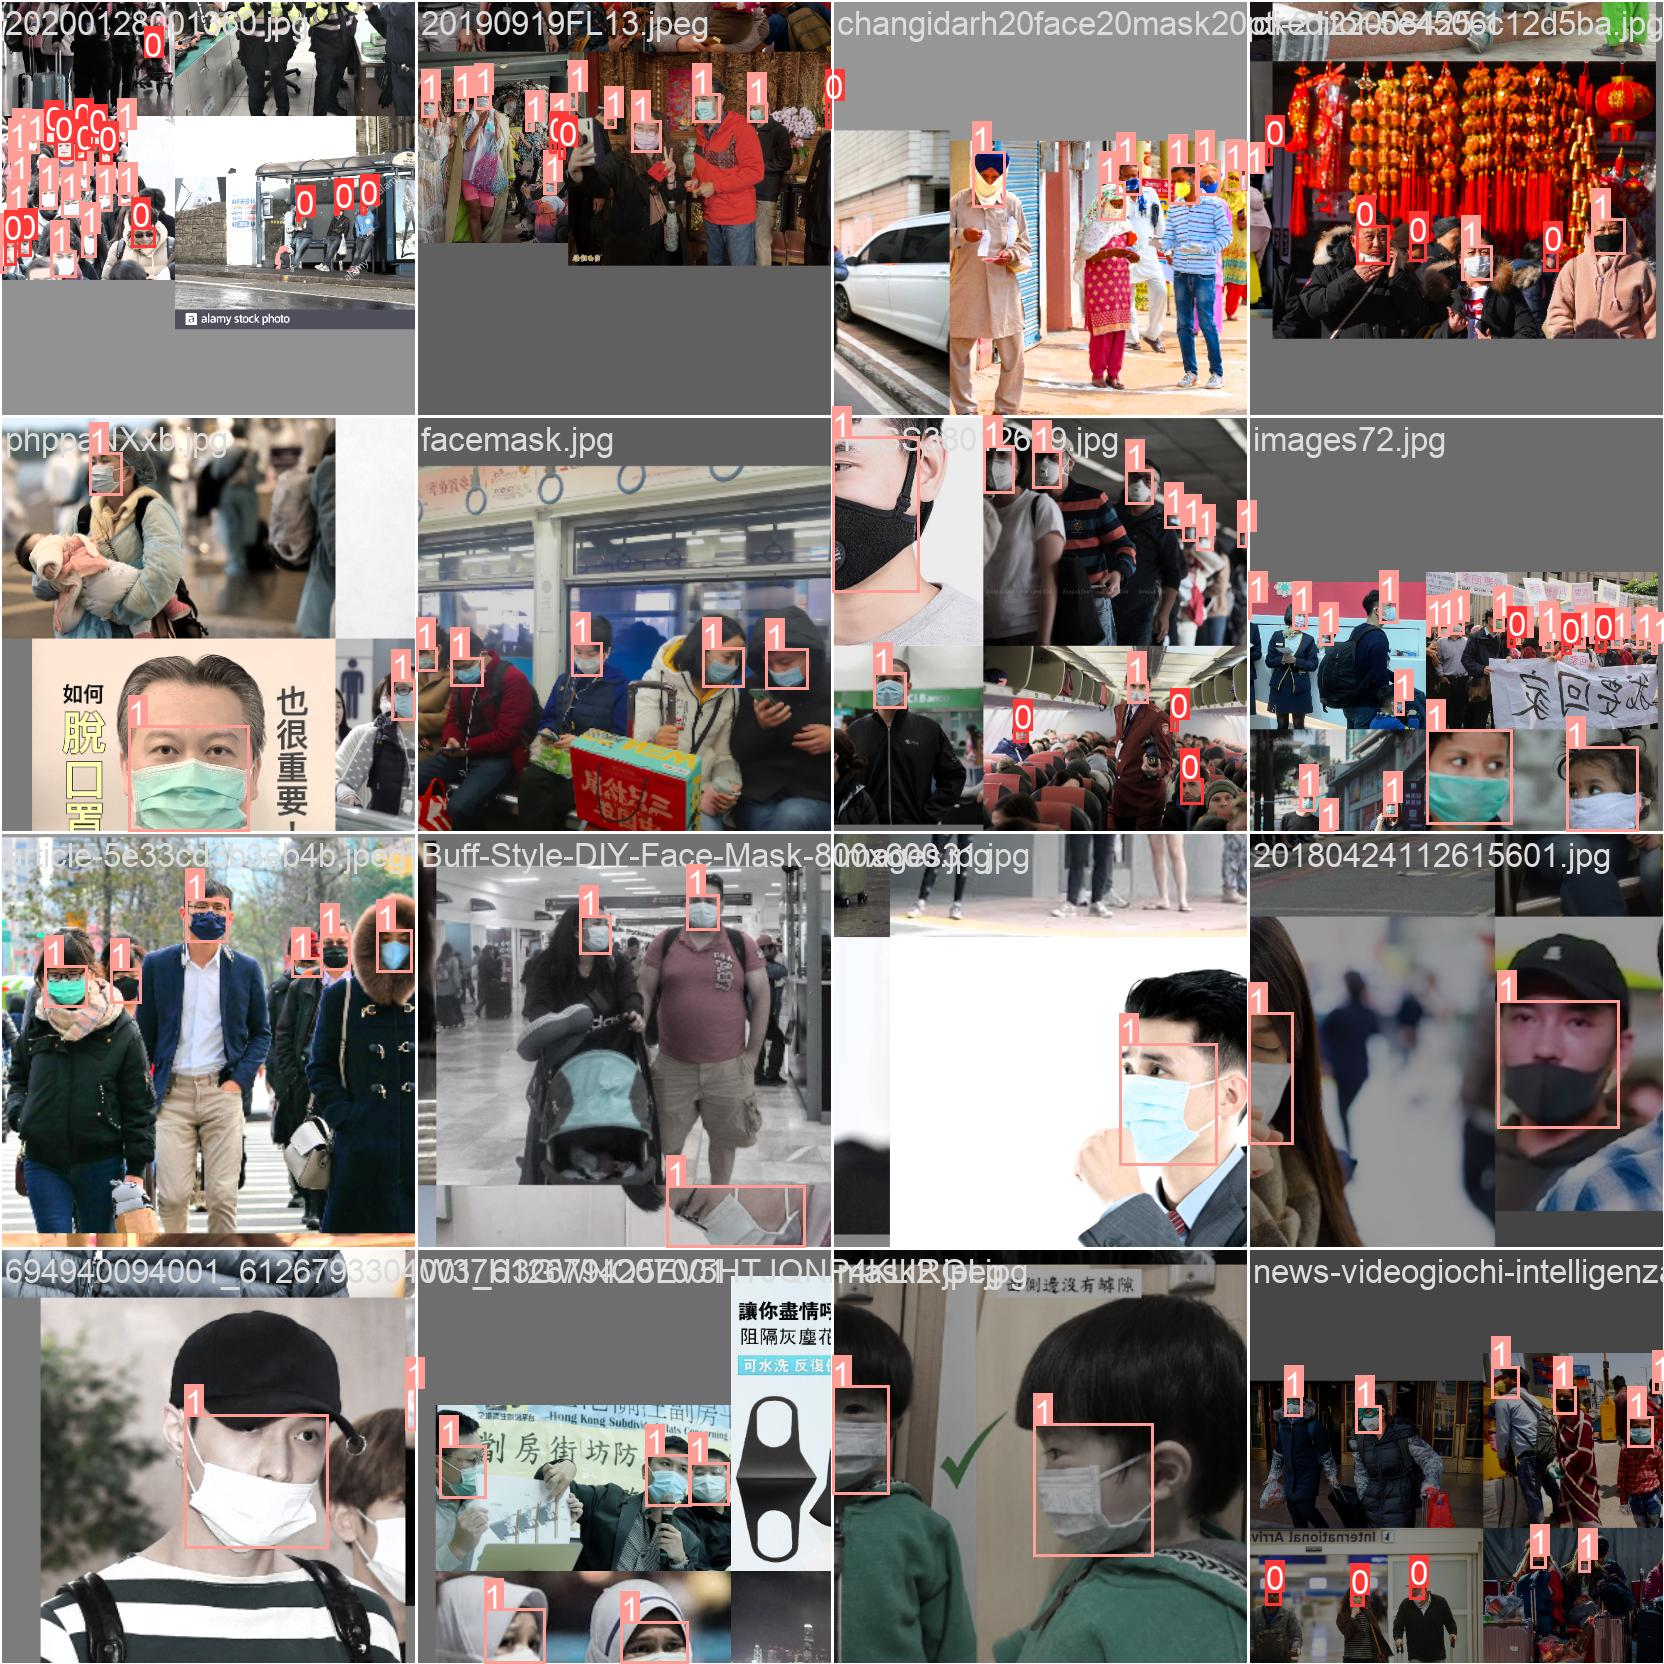

In [8]:
Image(filename='runs/train/exp2/train_batch1.jpg', width=1000)

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir runs

In [86]:
!python detect.py --source /Users/akhilsharma/Projects/Mask-NoMask-YOLO/random_test_images/5db917bb89170.jpg \
        --weights runs/train/exp2/weights/best.pt

detect: weights=['runs/train/exp2/weights/best.pt'], source=/Users/akhilsharma/Projects/Mask-NoMask-YOLO/random_test_images/5db917bb89170.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.9.6 torch-2.0.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/akhilsharma/Projects/Mask-NoMask-YOLO/random_test_images/5db917bb89170.jpg: 576x640 1 Mask, 2 No-Masks, 107.9ms
Speed: 0.7ms pre-process, 107.9ms inference, 0.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


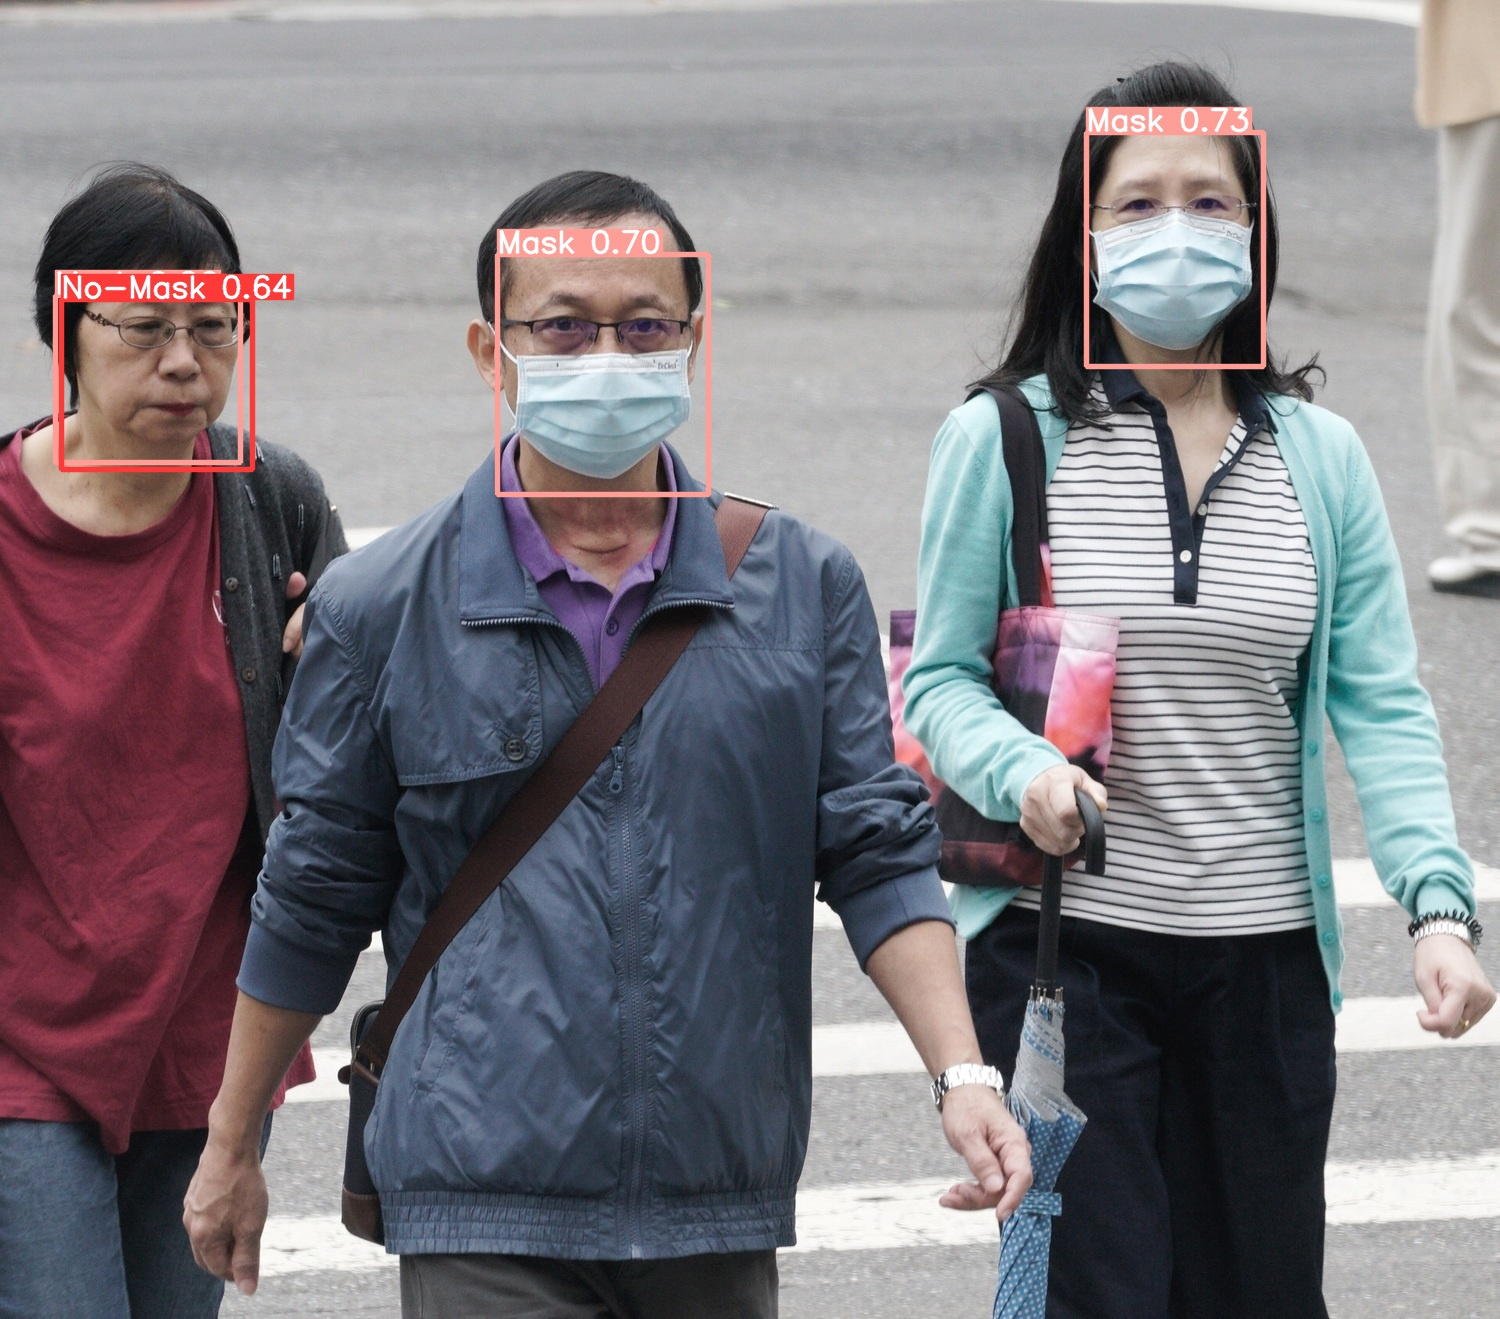

In [12]:
Image(filename='/Users/akhilsharma/Projects/Mask-NoMask-YOLO/yolov5/runs/detect/exp4/5db917bb89170.jpg', width=1000)

## Detect MASK using live web-cam

In [13]:
!python  detect.py --source 0  --weights runs/train/exp4/weights/best.pt

detect: weights=['runs/train/exp4/weights/best.pt'], source=0, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-163-g9d9a5b0 Python-3.9.6 torch-2.0.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
1/1: 0...  Success (inf frames 1280x720 at 30.00 FPS)

0: 384x640 (no detections), 82.0ms
0: 384x640 1 Mask, 63.9ms
0: 384x640 1 Mask, 63.5ms
0: 384x640 1 No-Mask, 1 Mask, 62.8ms
0: 384x640 1 Mask, 62.8ms
0: 384x640 1 No-Mask, 63.0ms
0: 384x640 1 No-Mask, 1 Mask, 60.9ms
0: 384x640 1 No-Mask, 1 Mask, 63.3ms
0: 384x640 1 No-Mask, 1 Mask, 62.4ms
0: 384x640 1 No-Mask, 63.4ms
0: 384x640 1 No-Mask,

## Export The MODEL 

In [78]:
!python export.py --weights runs/train/exp4/weights/best.pt --include tflite 

export: data=data/coco128.yaml, weights=['runs/train/exp4/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.9.6 torch-2.0.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp4/weights/best.pt with output shape (1, 25200, 7) (54.1 MB)

TensorFlow SavedModel: starting export with tensorflow 2.9.0...

                 from  n    params  module                                  arguments                     
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1